# DBSCAN Clustering Demo — Moons Dataset

This notebook provides an end-to-end example of applying DBSCAN using the `rice2025` package. The goal is to demonstrate how density-based clustering can identify non-linear cluster shapes and noise points, using the classic two-moons dataset.


## What this notebook is about

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised learning algorithm that groups points based on density rather than distance to centroids. Unlike K-Means, DBSCAN is able to discover arbitrarily shaped clusters and automatically detect noise points.

In this notebook, I use DBSCAN to identify the curved cluster structure in a two-moons dataset. The focus is on:

- Visualizing the data
- Understanding DBSCAN’s parameters (`eps` and `min_samples`)
- Fitting the density-based model
- Interpreting core points, border points, and noise
- Exploring how parameter choices affect the clusters


## Mathematical Intuition Behind DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) defines clusters as **connected regions of high point density**, rather than collections of points organized around a centroid. This density-based perspective allows DBSCAN to identify clusters of arbitrary shape and to explicitly label outliers as noise.

### $\varepsilon$-Neighborhood

Let $X = \{x_1, x_2, \dots, x_n\} \subset \mathbb{R}^d$ be a dataset with distance metric $d(\cdot, \cdot)$ (typically Euclidean distance).

For any point $x_i$, its **$\varepsilon$-neighborhood** is:
$$
\mathcal{N}_\varepsilon(x_i) = \{ x_j \in X \mid d(x_i, x_j) \le \varepsilon \}.
$$

This neighborhood measures the *local density* around a point.

### Core Points, Border Points, and Noise

Using a user-specified parameter `min_samples`, DBSCAN classifies points as follows:

- **Core point**: a point with at least `min_samples` points (including itself) in its $\varepsilon$-neighborhood:
$$
\left|\mathcal{N}_\varepsilon(x_i)\right| \ge \text{min\_samples}.
$$

- **Border point**: a point that is **not** a core point, but lies within the $\varepsilon$-neighborhood of a core point.

- **Noise point**: a point that is neither a core point nor density-reachable from any core point. Noise points are labeled $-1$.

### Density Reachability

DBSCAN forms clusters using **density reachability**:

- $x_j$ is **directly density-reachable** from $x_i$ if:
  1) $x_i$ is a core point, and  
  2) $x_j \in \mathcal{N}_\varepsilon(x_i)$.

- $x_k$ is **density-reachable** from $x_i$ if there exists a chain of points
$$
x_i \rightarrow x_{i_1} \rightarrow x_{i_2} \rightarrow \cdots \rightarrow x_k
$$
such that each step is directly density-reachable from the previous point.

Intuitively: clusters are built by “flood-filling” outward from core points through overlapping dense neighborhoods.

### Why DBSCAN Finds Arbitrary Shapes

Unlike K-Means, DBSCAN does not assume spherical clusters. It connects points based on **local density connectivity**, so it can recover curved or elongated structures (like the two-moons) as long as there is a continuous path of dense neighborhoods.

### Role of Parameters: `eps` and `min_samples`

- **`eps` ($\varepsilon$)** sets the neighborhood radius.  
  - Too small $\varepsilon$ $\rightarrow$ clusters fragment and more points may become noise.  
  - Too large $\varepsilon$ $\rightarrow$ distinct clusters can merge and noise may disappear.

- **`min_samples`** sets the minimum density required to treat a point as a core point.  
  - Larger `min_samples` $\rightarrow$ stricter density requirement (more robust, potentially more noise).  
  - Smaller `min_samples` $\rightarrow$ easier to form clusters (more sensitive to spurious structure).

### Summary

DBSCAN treats clustering as a **density connectivity problem** rather than a centroid assignment problem. This is why it is effective for:
- non-linear / non-spherical cluster shapes,
- datasets with outliers,
- situations where the number of clusters is unknown in advance.


## Dataset: `cluster_moons.csv`

The dataset used in this demo (`cluster_moons.csv`) contains two-dimensional points forming two interlocking moon-shaped clusters. This dataset is a standard example for demonstrating algorithms that capture non-linear structure.

Columns:

- `X1` — first feature  
- `X2` — second feature  

These features allow for straightforward visualization and make the advantages of DBSCAN easy to see.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rice2025.unsupervised_learning.dbscan import DBSCAN


In [2]:
df = pd.read_csv("cluster_moons.csv")
df.head()


,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


## Raw Data Visualization

Before clustering, it is helpful to plot the raw data to understand its structure. The two-moons dataset consists of two curved clusters that cannot be separated by linear or spherical decision boundaries, making it a good test for DBSCAN.


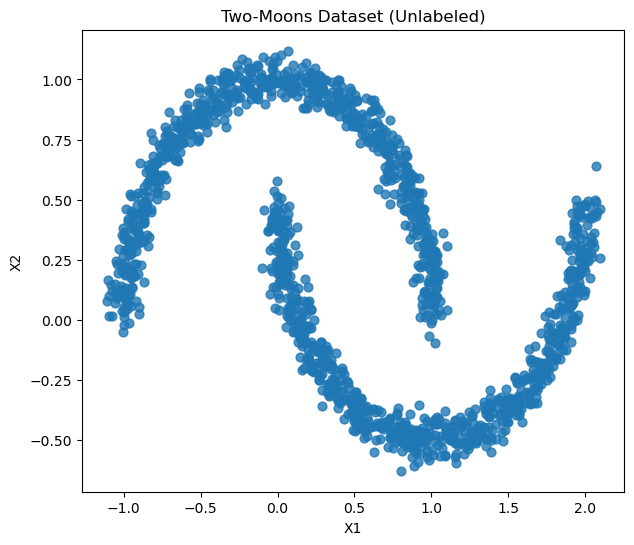

In [3]:
plt.figure(figsize=(7,6))
plt.scatter(df["X1"], df["X2"], s=40, alpha=0.8)
plt.title("Two-Moons Dataset (Unlabeled)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## What is DBSCAN?

DBSCAN groups points based on density. It requires two parameters:

- **eps** — the radius of a neighborhood around a point  
- **min_samples** — the minimum number of points required to form a dense region  

Given a point \( x_i \), DBSCAN identifies:

- **Core points**: points with at least `min_samples` neighbors within distance `eps`  
- **Border points**: points reachable from a core point but not dense enough to be core  
- **Noise points**: points not reachable from any core point  

Formally, the neighborhood of a point is:

$$
N_\varepsilon(x_i) = \{ x_j : \|x_i - x_j\| \le \varepsilon \}
$$

Clusters are formed by connecting core points that are density-reachable, allowing DBSCAN to recover clusters of arbitrary shape.


In [4]:
X = df[["X1", "X2"]].values

dbscan = DBSCAN(eps=0.15, min_samples=5)
labels = dbscan.fit_predict(X)

labels[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

## Visualizing DBSCAN Clusters

DBSCAN assigns cluster labels to core and border points. Noise points receive a label of `-1`. This plot highlights the discovered clusters along with any noise.


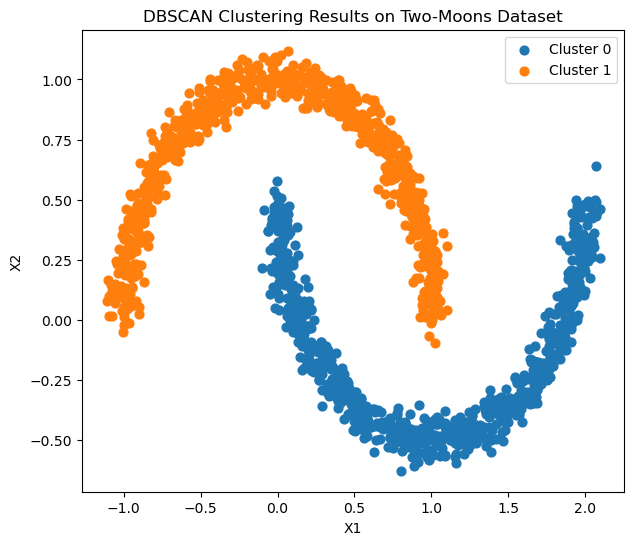

In [5]:
plt.figure(figsize=(7,6))
unique_labels = np.unique(labels)

for label in unique_labels:
    mask = labels == label
    if label == -1:
        # noise points
        plt.scatter(X[mask, 0], X[mask, 1], s=40, color="black", label="Noise")
    else:
        plt.scatter(X[mask, 0], X[mask, 1], s=40, label=f"Cluster {label}")

plt.title("DBSCAN Clustering Results on Two-Moons Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


## Exploring Different eps Values

The choice of `eps` has a strong effect on DBSCAN’s performance.  
A smaller `eps` can fragment clusters, while a larger one can merge them or remove noise.

Below is a comparison of several values of `eps` to see how cluster structure changes.


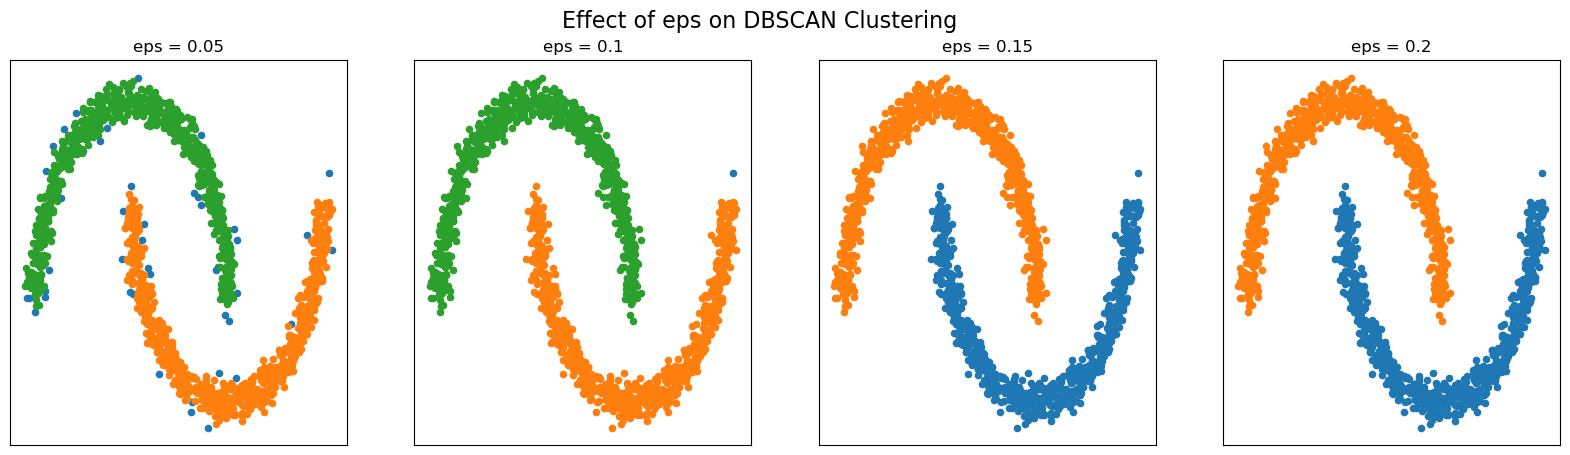

In [6]:
eps_values = [0.05, 0.10, 0.15, 0.20]

fig, axes = plt.subplots(1, 4, figsize=(20,5))

for ax, eps in zip(axes, eps_values):
    model = DBSCAN(eps=eps, min_samples=5)
    labs = model.fit_predict(X)

    for lbl in np.unique(labs):
        mask = labs == lbl
        ax.scatter(X[mask, 0], X[mask, 1], s=20)

    ax.set_title(f"eps = {eps}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Effect of eps on DBSCAN Clustering", fontsize=16)
plt.show()


## k-Distance Plot (Choosing eps)

A common heuristic for selecting `eps` is the *k-distance graph*, where for each point we compute the distance to its `min_samples`-th nearest neighbor. A sharp change ("elbow") in this plot provides a good estimate for `eps`.

Below I compute the distances to the 5th nearest neighbor (since `min_samples=5`).


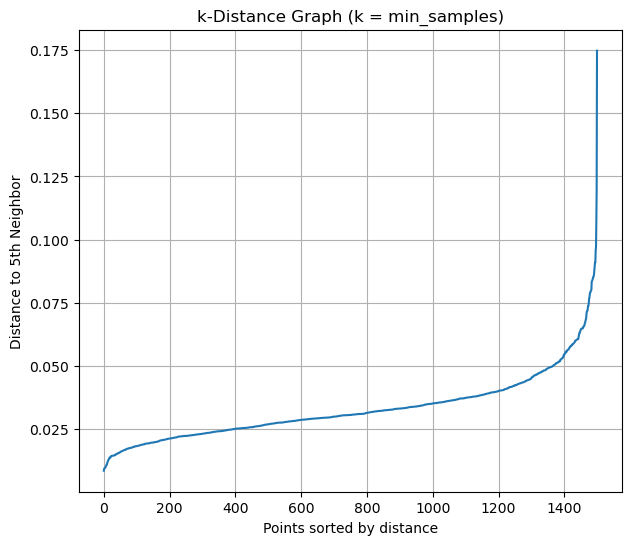

In [8]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=dbscan.min_samples_).fit(X)
distances, _ = neigh.kneighbors(X)
k_dist = np.sort(distances[:, -1])  # distance to k-th neighbor

plt.figure(figsize=(7,6))
plt.plot(k_dist)
plt.title("k-Distance Graph (k = min_samples)")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to 5th Neighbor")
plt.grid(True)
plt.show()


## Cluster Summary

DBSCAN automatically determines the number of clusters and the amount of noise. Below is a summary of the results.


In [9]:
n_clusters = dbscan.n_clusters_
n_noise = np.sum(dbscan.labels_ == -1)

print("Estimated number of clusters:", n_clusters)
print("Estimated number of noise points:", n_noise)
print("Number of core samples:", len(dbscan.core_sample_indices_))


Estimated number of clusters: 2
Estimated number of noise points: 0
Number of core samples: 1499


## Core Points, Border Points, and Noise

DBSCAN distinguishes among three types of points:

- **Core points**: points with at least `min_samples` neighbors within `eps`
- **Border points**: points reachable from a core point but not dense enough to be core themselves
- **Noise points**: points that are not reachable from any core point

Since the `rice2025` implementation stores the indices of core samples, I can visualize each group explicitly.


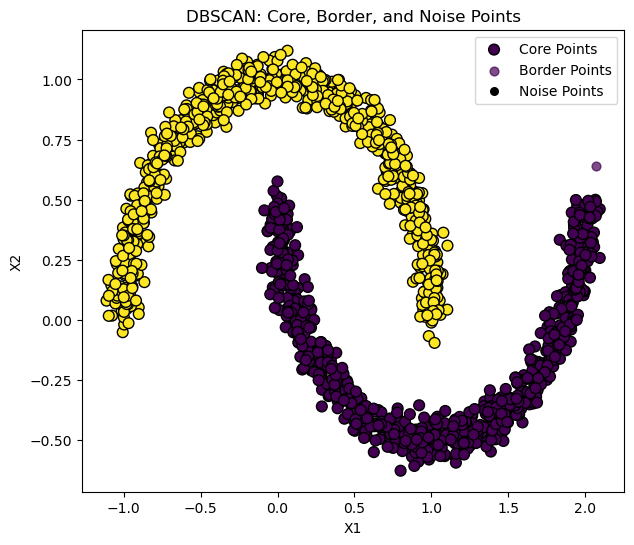

In [7]:
core_idx = dbscan.core_sample_indices_
labels = dbscan.labels_

plt.figure(figsize=(7,6))

# Core points
plt.scatter(
    X[core_idx, 0],
    X[core_idx, 1],
    c=labels[core_idx],
    cmap="viridis",
    s=60,
    edgecolor="black",
    label="Core Points"
)

# Border points
border_idx = np.where((labels != -1) & (~np.isin(np.arange(len(X)), core_idx)))[0]
plt.scatter(
    X[border_idx, 0],
    X[border_idx, 1],
    c=labels[border_idx],
    cmap="viridis",
    s=40,
    alpha=0.7,
    label="Border Points"
)

# Noise points
noise_idx = np.where(labels == -1)[0]
plt.scatter(
    X[noise_idx, 0],
    X[noise_idx, 1],
    c="black",
    s=30,
    label="Noise Points"
)

plt.title("DBSCAN: Core, Border, and Noise Points")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()


## Interpretation

DBSCAN successfully identifies the two curved moon-shaped clusters without requiring a predefined number of clusters. It also identifies sparse points as noise when appropriate. This demonstrates the strength of density-based clustering methods in settings where cluster shapes are irregular or overlapping.

Compared to K-Means, DBSCAN handles:

- Non-spherical clusters  
- Variations in density  
- Noise points  
- Arbitrary shapes  

These properties make DBSCAN a useful tool for exploratory data analysis.


## Conclusion

This notebook demonstrated how DBSCAN can uncover non-linear cluster structures using the implementation from the `rice2025` package. By adjusting `eps` and `min_samples`, DBSCAN reveals meaningful patterns in the two-moons dataset and highlights the presence of noise points.

The example shows how density-based clustering provides an alternative to centroid-based methods like K-Means, especially when cluster shapes are complex.
